In [1]:
import torch

In [2]:
words = open('names.txt', 'r').read().splitlines()

## Bigram (Counting Approach)

In [8]:
chars = sorted(list(set(''.join(words))))
stoi = {s:i+1 for i,s in enumerate(chars)}
stoi['.'] = 0
itos = {i:s for s,i in stoi.items()}
print(stoi)

{'a': 1, 'b': 2, 'c': 3, 'd': 4, 'e': 5, 'f': 6, 'g': 7, 'h': 8, 'i': 9, 'j': 10, 'k': 11, 'l': 12, 'm': 13, 'n': 14, 'o': 15, 'p': 16, 'q': 17, 'r': 18, 's': 19, 't': 20, 'u': 21, 'v': 22, 'w': 23, 'x': 24, 'y': 25, 'z': 26, '.': 0}


In [9]:
N = torch.zeros((28,28), dtype=torch.int32)

for w in words:
    chs = ['.'] + list(w) + ['.']
    for ch1, ch2 in zip(chs, chs[1:]):
        ix1=stoi[ch1]
        ix2=stoi[ch2]
        N[ix1,ix2] += 1

(np.float64(-0.5), np.float64(27.5), np.float64(27.5), np.float64(-0.5))

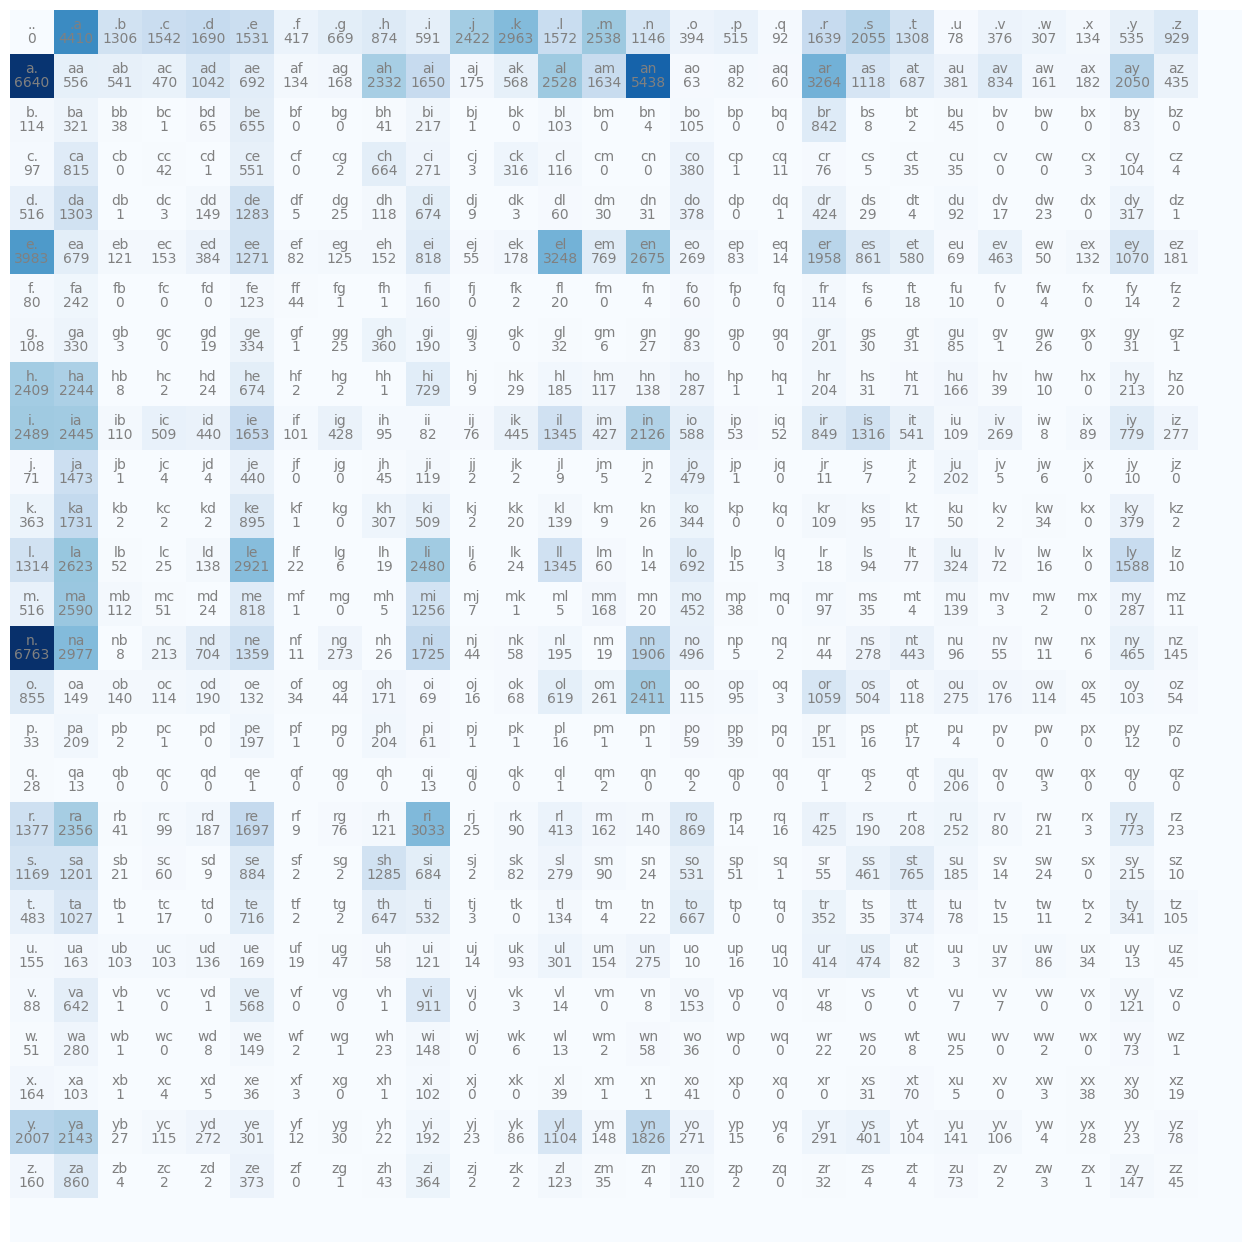

In [11]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(16,16))
plt.imshow(N, cmap='Blues')
for i in range(27):
    for j in range(27):
        chstr = itos[i] + itos[j]
        plt.text(j, i, chstr, ha="center", va="bottom", color="gray")
        plt.text(j, i, N[i, j].item(), ha="center", va="top", color="gray")
plt.axis('off')

In [12]:
P = N.float()
P = P / P.sum(1, keepdims=True)

In [19]:
g = torch.Generator().manual_seed(2147483647)

for i in range(5):
    out = []
    ix = 0
    while True:
        p = P[ix]
        ix = torch.multinomial(p, num_samples=1, replacement=True, generator=g).item()
        out.append(itos[ix])
        if ix == 0:
            break

    print(''.join(out))

cava.
ayamaijowy.
aianeta.
rl.
miryndardyrioma.


## Neural Network Approach

In [26]:
xs, ys = [], []

for w in words:
    chs = ['.'] + list(w) + ['.']
    for ch1, ch2 in zip(chs, chs[1:]):
        ix1 = stoi[ch1]
        ix2 = stoi[ch2]
        xs.append(ix1)
        ys.append(ix2)

xs = torch.tensor(xs)
ys = torch.tensor(ys)
num = xs.nelement()

In [34]:
g = torch.Generator().manual_seed(2147483647)
W = torch.randn((27,27), generator=g, requires_grad=True)

In [45]:
import torch.nn.functional as F

for k in range(1009):
    # forward pass
    xenc = F.one_hot(xs, num_classes=27).float()
    logits = xenc @ W
    counts = logits.exp()
    probs = counts / counts.sum(1, keepdim=True)
    loss = -probs[torch.arange(num), ys].log().mean()

    #backward pass
    W.grad = None
    loss.backward()

    #update
    W.data -= 50 * W.grad
    print(loss.item())

2.457934856414795
2.457923650741577
2.4579124450683594
2.4579012393951416
2.4578897953033447
2.4578793048858643
2.4578680992126465
2.4578566551208496
2.457845687866211
2.4578351974487305
2.457824230194092
2.4578135013580322
2.4578027725219727
2.457792282104492
2.457782030105591
2.457771062850952
2.4577605724334717
2.457750082015991
2.45773983001709
2.4577295780181885
2.457719326019287
2.4577090740203857
2.4576990604400635
2.457688808441162
2.457679033279419
2.4576690196990967
2.4576590061187744
2.457648992538452
2.457639217376709
2.457629442214966
2.4576194286346436
2.4576098918914795
2.4576003551483154
2.4575905799865723
2.4575812816619873
2.4575717449188232
2.45756196975708
2.457552671432495
2.4575436115264893
2.457534074783325
2.4575250148773193
2.4575157165527344
2.4575066566467285
2.4574975967407227
2.457488536834717
2.457479238510132
2.457470178604126
2.457461357116699
2.4574527740478516
2.4574437141418457
2.457434892654419
2.457425832748413
2.4574170112609863
2.4574086666107178


In [50]:
for i in range(5):
    out = []
    ix = 0
    while True:
        p = P[ix]

        ix = torch.multinomial(p, num_samples=1, replacement=True, generator=g).item()
        out.append(itos[ix])
        if ix == 0:
            break

    print(''.join(out))

rura.
anguni.
b.
jann.
iale.
